In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [4]:
data_one = pd.read_csv("data/2000to2012.csv")
data_two = pd.read_csv("data/2012to2014.csv")
data_three = pd.read_csv("data/jan2015toDec2016.csv")
data_four = pd.read_csv("data/jan2017upwards.csv")

data_one.drop(columns=["block","street_name"])
data_two.drop(columns=["block","street_name"])
data_three.drop(columns=["block","street_name"])
data_four.drop(columns=["block","street_name"])

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...
174990,2024-03,YISHUN,5 ROOM,01 TO 03,121.0,Improved,1987,62 years 07 months,613000.0
174991,2024-03,YISHUN,5 ROOM,07 TO 09,122.0,Improved,1988,62 years 11 months,745000.0
174992,2024-03,YISHUN,EXECUTIVE,01 TO 03,145.0,Maisonette,1988,63 years 05 months,820000.0
174993,2024-03,YISHUN,EXECUTIVE,10 TO 12,146.0,Apartment,1987,62 years 07 months,851888.0


In [5]:
CPIData = pd.read_csv('data\PercentChangeInConsumerPriceIndexCPIOverPreviousPeriod2019AsBaseYearMonthly.csv', header=None)
datetoextract = CPIData.iloc[0]
indextoextract = CPIData.iloc[67]
data = {'Period': datetoextract, 'CPIvalue': indextoextract}
AccomsCPI = pd.DataFrame(data)
AccomsCPI = AccomsCPI.drop(AccomsCPI.index[0])

AccomsCPI[['Year', 'Month']] = AccomsCPI['Period'].str.extract('(\d{4})(\w{3})', expand=True)
AccomsCPI['Date'] = pd.to_datetime(AccomsCPI['Year'] + AccomsCPI['Month'], format='%Y%b')
AccomsCPI = AccomsCPI.sort_values(['Year', 'Date'], ascending=[False, False])
AccomsCPI = AccomsCPI[AccomsCPI['Date'] >= '2000-01-01']
AccomsCPI = AccomsCPI.drop(['Year', 'Month', 'Date'], axis=1)
AccomsCPI.loc[AccomsCPI['CPIvalue'] == 'na', 'CPIvalue'] = 0
AccomsCPI = AccomsCPI.reset_index(drop=True)
AccomsCPI['CPIvalue'] = AccomsCPI['CPIvalue'].astype(float)
AccomsCPI.dtypes

Period       object
CPIvalue    float64
dtype: object

In [6]:
cpi_values = AccomsCPI['CPIvalue'].tolist()
AccomsCPI['AdjustmentValue'] = 1

for idx, cpi in enumerate(AccomsCPI['CPIvalue']):
    if idx != 0:
        AccomsCPI.loc[idx, 'AdjustmentValue'] = AccomsCPI.loc[idx - 1, 'AdjustmentValue'] * (1 + (AccomsCPI.loc[idx - 1, 'CPIvalue'] / 100))

AccomsCPI.head()

,Period,CPIvalue,AdjustmentValue
0,2024Jan,-2.7,1.000000
1,2023Dec,0.2,0.973000
2,2023Nov,1.9,0.974946
3,2023Oct,-1.4,0.993470
4,2023Sep,0.3,0.979561


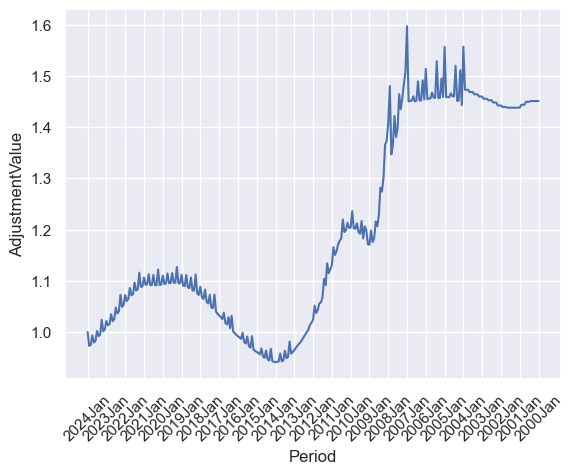

In [7]:
ax = sb.lineplot(data=AccomsCPI, x='Period', y='AdjustmentValue' )
ax.set_xticks(range(0, len(AccomsCPI), 12))  
ax.set_xticklabels([AccomsCPI['Period'][i] for i in range(0, len(AccomsCPI), 12)], rotation=45) 

plt.show()